<img src="images/banner_introRProg.png" align="left" />

<table style="float:right;">
    <tr>
        <td>                      
            <div style="text-align: right"><a href="https://www.research.manchester.ac.uk/portal/syed.murtuzabaker.html" target="_blank">Syed Murtuza Baker</a></div>
            <div style="text-align: right">Research Fellow</div>
            <div style="text-align: right">University of Manchester</div>
         </td>
         <td>
             <img src="images/Syed_Baker.jpg" width="50%" />
         </td>
     </tr>
</table>

# Introduction to ggplot2
****

#### About this Notebook

This notebook would introduce `ggplot2`, one of the most widely used data visualization package.

Level: <code>beginner</code> 

Duration: Approximately 2 hours to complete

<div class="alert alert-block alert-warning"><b>Learning Objectives:</b> 
<br/> At the end of this notebook you will be able to:
    
- Describe the features of the ggplot2 package
    
- Plot in R 
    
- Explain which plots require statistical transformations


</div> 

<a id="top"></a>

<b>Table of contents</b><br>

1.0 [Introduction](#intro)

2.0 [About ggplot2](#ggplot2)

3.0 [Your Turn](#yourturn)

*****

<a id="intro"></a>

## Introduction

R is one of the leading programming languages in Biological data analysis. It is used to perform data analyis, statistics, machine learning and visualisations. This course is designed as an introduction to R for participants with no previous programming experience. 


`ggplot2` is a powerful and a flexible R package, implemented by Hadley Wickham, for producing elegant graphics piece by piece (Wickham et al. 2017).


For help in using this Jupyter notebook please refer to the [Jupyter Notebook User Guide](https://online.manchester.ac.uk/bbcswebdav/orgs/I3116-ADHOC-I3HS-HUB-1/Jupyter%20Notebooks/content/index.html#/)






*****
[back to the top](#top)

### Load the libraries

We first load the `tidyverse` package. `tidyverse` package is a collection of many packages among which `ggplot2` is one. If you want, you can only load the `ggplot2` package as well. 

In [5]:
library(tidyverse)

We additionally load the `dplyr` package. `dplyr` is called __grammar of data manipulation__ that provides a consistent set of verbs that help you to manipulate data in many different ways. `dplyr` is also loaded with `tidyverse` but we are just showing it here that you can load it seprately as well. We will use some verbs from `dplyr` package in this notebook to manipulate our data in a certain way before plotting it using `ggplot2`.

In [6]:
library(dplyr)

Next we load the `scater` package. `scater` is a bioconductor package for doing various sets of analysis on single cell RNA-seq data. It especially focuses on quality control and visualization of single cell data. The dummy data we will be using to learn our `ggplot2` plotting functions are a `SingleCellExperiment` object that is holding single cell gene expression data from CMML (Chronic myelomonocytic leukaemia) patients and healthy controls. Let's discuss what bioconductor, single cell RNA-seq and `SingleCellExperiment` object is.

- Bioconductor: According to wikipedia,
> _Bioconductor is a free, open source and open development software project for the analysis and comprehension of genomic data generated by wet lab experiments in molecular biology. Bioconductor is based primarily on the statistical R programming language, but does contain contributions in other programming languages._


- Single cell RNA-seq: Single cell RNA-seq is a technique to measure the gene expression of each individual cell in a sample. Single cell RNA-seq helps to characterize each of the cells in a heterogeneous cell population



- `SingleCellExperiment` class: According to Bioconductor,
> The `SingleCellExperiment` class is a lightweight Bioconductor container for storing and manipulating single-cell genomics data. It's column represent cells and row represents features which can be genes, transcripts or genomic locations. Following diagram nicely shows how a single cell data is stored in `SingleCellExperiment` object

![SingleCellExperiment](images/SingleCellExperiment.png)


In [7]:
library(scater)

We now load the `SingleCellExperiment` object. The object is stored into a file called `sce.rds`. We would load this file using `readRDS` command into the a `SingleCellExperiment` object. We are calling this object `sce`

In [9]:
sce <- readRDS('/mnt/sce.rds')
sce

class: SingleCellExperiment 
dim: 12695 6826 
metadata(0):
assays(3): counts logcounts norm_exprs
rownames(12695): FO538757.2 AP006222.2 ... AC004556.1 AC240274.1
rowData names(12): id symbol ... total_counts log10_total_counts
colnames(6826): AAACCTGCACCGATAT-1 AAACGGGCACGACTCG-1 ...
  TTTGGTTTCATCTGCC-11 TTTGTCAGTAGGAGTC-11
colData names(59): barcode Sample ... sizeFactor cellType
reducedDimNames(1): tSNE
mainExpName: NULL
altExpNames(0):

Let us explore our `sce` object a bit. First let me print the log-normalized count for two genes, 'KLF4' and 'RUNX1' across 5 cells

In [12]:
logcounts(sce)[c('KLF4','RUNX1'),1:5]

,AAACCTGCACCGATAT-1,AAACGGGCACGACTCG-1,AAAGCAATCCTAAGTG-1,AAAGTAGGTGATGATA-1,AAAGTAGTCTCGCTTG-1
KLF4,0.0000,6.429876,0.000000,0.000000,0.00000
RUNX1,7.4776,8.003639,6.077144,6.355761,6.49536


In the above code, `logcounts()` is a built-in function that takes out the log-normalized count data from a `SingleCellExperiment` object. The column names are the cell-barcodes. Each of the cell has it's own barcode to uniquely identify them.

### Metadata of the cells
The `colData` shows all the metadata associated with the cells. Let us see the metadata for our `sce` object

In [16]:
names(colData(sce))

[1] "barcode"                                       
 [2] "Sample"                                        
 [3] "total_features"                                
 [4] "log10_total_features"                          
 [5] "pct_counts_top_50_features"                    
 [6] "pct_counts_top_100_features"                   
 [7] "pct_counts_top_200_features"                   
 [8] "pct_counts_top_500_features"                   
 [9] "total_features_endogenous"                     
[10] "log10_total_features_endogenous"               
[11] "pct_counts_top_50_features_endogenous"         
[12] "pct_counts_top_100_features_endogenous"        
[13] "pct_counts_top_200_features_endogenous"        
[14] "pct_counts_top_500_features_endogenous"        
[15] "total_features_feature_control"                
[16] "log10_total_features_feature_control"          
[17] "total_features_Mt"                             
[18] "log10_total_features_Mt"                       
[19] "is_cell_control"                               
[20] "total_features_by_counts"                      
[21] "log10_total_features_by_counts"                
[22] "total_counts"                                  
[23] "log10_total_counts"                            
[24] "pct_counts_in_top_50_features"                 
[25] "pct_counts_in_top_100_features"                
[26] "pct_counts_in_top_200_features"                
[27] "pct_counts_in_top_500_features"                
[28] "total_features_by_counts_endogenous"           
[29] "log10_total_features_by_counts_endogenous"     
[30] "total_counts_endogenous"                       
[31] "log10_total_counts_endogenous"                 
[32] "pct_counts_endogenous"                         
[33] "pct_counts_in_top_50_features_endogenous"      
[34] "pct_counts_in_top_100_features_endogenous"     
[35] "pct_counts_in_top_200_features_endogenous"     
[36] "pct_counts_in_top_500_features_endogenous"     
[37] "total_features_by_counts_feature_control"      
[38] "log10_total_features_by_counts_feature_control"
[39] "total_counts_feature_control"                  
[40] "log10_total_counts_feature_control"            
[41] "pct_counts_feature_control"                    
[42] "pct_counts_in_top_50_features_feature_control" 
[43] "pct_counts_in_top_100_features_feature_control"
[44] "pct_counts_in_top_200_features_feature_control"
[45] "pct_counts_in_top_500_features_feature_control"
[46] "total_features_by_counts_Mt"                   
[47] "log10_total_features_by_counts_Mt"             
[48] "total_counts_Mt"                               
[49] "log10_total_counts_Mt"                         
[50] "pct_counts_Mt"                                 
[51] "pct_counts_in_top_50_features_Mt"              
[52] "pct_counts_in_top_100_features_Mt"             
[53] "pct_counts_in_top_200_features_Mt"             
[54] "pct_counts_in_top_500_features_Mt"             
[55] "CellCycle"                                     
[56] "Cluster"                                       
[57] "Phase"                                         
[58] "sizeFactor"                                    
[59] "cellType"

There are lots of information about the cells. But we will just use the barcode, Sample and Cluster metadata for these cells. So first lets extract these metadata and assign it to a new variable. We are naming the variable as `metadata_sce`. Please note `metadata_sce` will be a `data.frame` as we are copying from another `data.frame`

In [18]:
metadata_sce <- colData(sce)[,c('barcode','Sample','Cluster')]

In [20]:
head(metadata_sce)

DataFrame with 6 rows and 3 columns
                              barcode      Sample  Cluster
                             <factor> <character> <factor>
AAACCTGCACCGATAT-1 AAACCTGCACCGATAT-1       BC543        2
AAACGGGCACGACTCG-1 AAACGGGCACGACTCG-1       BC543        2
AAAGCAATCCTAAGTG-1 AAAGCAATCCTAAGTG-1       BC543        2
AAAGTAGGTGATGATA-1 AAAGTAGGTGATGATA-1       BC543        2
AAAGTAGTCTCGCTTG-1 AAAGTAGTCTCGCTTG-1       BC543        2
AACACGTGTTGGTAAA-1 AACACGTGTTGGTAAA-1       BC543        2

### Copying the gene expression values to a martrix

We now copy the logcount values to a matrix can will call it `norm_counts`. We will use this matrix for all our plotting. Also, please note that we will transpose the matrix so that the gene names will go into column and cell names will go into rows. This is because `ggplot2` plots the data based on what is in the column of a matrix

In [13]:
norm_counts <- t(logcounts(sce))

Let us again see what is in `norm_counts`. We will print the first 5 cells and the two gene like before. But now the genes are in column and cells are in row

In [24]:
norm_counts[1:5, c('KLF4','RUNX1')]

,KLF4,RUNX1
AAACCTGCACCGATAT-1,0.000000,7.477600
AAACGGGCACGACTCG-1,6.429876,8.003639
AAAGCAATCCTAAGTG-1,0.000000,6.077144
AAAGTAGGTGATGATA-1,0.000000,6.355761
AAAGTAGTCTCGCTTG-1,0.000000,6.495360


### Data preperation

We will now combine the cell metada and the count data of three genes into one dataframe. This would make our plotting easier

In [25]:
d_exp <- as_tibble(metadata_sce)
d_exp <- cbind(d_exp, norm_counts[,c('KLF4','RUNX1','EGR1')])

Let's look how `d_exp` dataframe looks like

In [26]:
head(d_exp)

,barcode,Sample,Cluster,KLF4,RUNX1,EGR1
,<fct>,<chr>,<fct>,<dbl>,<dbl>,<dbl>
AAACCTGCACCGATAT-1,AAACCTGCACCGATAT-1,BC543,2,0.000000,7.477600,6.485672
AAACGGGCACGACTCG-1,AAACGGGCACGACTCG-1,BC543,2,6.429876,8.003639,6.429876
AAAGCAATCCTAAGTG-1,AAAGCAATCCTAAGTG-1,BC543,2,0.000000,6.077144,8.381875
AAAGTAGGTGATGATA-1,AAAGTAGGTGATGATA-1,BC543,2,0.000000,6.355761,6.355761
AAAGTAGTCTCGCTTG-1,AAAGTAGTCTCGCTTG-1,BC543,2,0.000000,6.495360,8.069622
AACACGTGTTGGTAAA-1,AACACGTGTTGGTAAA-1,BC543,2,0.000000,7.201707,0.000000


We will now use this data for our ggplot2 plotting.


*****
[back to the top](#top)

<a id="ggplot2"></a>

## Basics of `ggplot2`


The `gg` in `ggplot2` means __Grammar of Graphics__, a graphic concept which describes plots by using a “grammar”. According to the ggplot2 concept, a plot can be divided into different fundamental parts:


>Plot = Data + Aesthetics + Geometry

* Data: a data frame with the data in the columns which we want to plot
- Aesthetics: used to indicate the x and y variables. It can be also used to control the color, the size and the shape of points, etc…..
- Geometry: corresponds to the type of graphics (scatter plot, histogram, box plot, line plot, ….). Additional layers for customization can be done with — `title`, `labels`, `axis`, etc.

### First Plotting

The main function in the ggplot2 package is `ggplot()`, which can be used to initialize the plotting system with data and `x/y` variables.

`ggplot()` creates a coordinate system to which you can add layers to. The first argument of `ggplot()` is the dataset to use in the graph. So `ggplot(data = d_exp`) creates an empty graph (you just see a gray frame).

For example, the following R code takes the _KLF4_ and _RUNX1_ data set to initialize the ggplot and then a layer (`geom_point()`) is added onto the ggplot to create a scatter plot of `x = KLF4` by `y = RUNX1`:

```
Data= d_exp
Aesthetic=: aes(x=KLF4, y=RUNX1)
Geometry= geom_point()
```

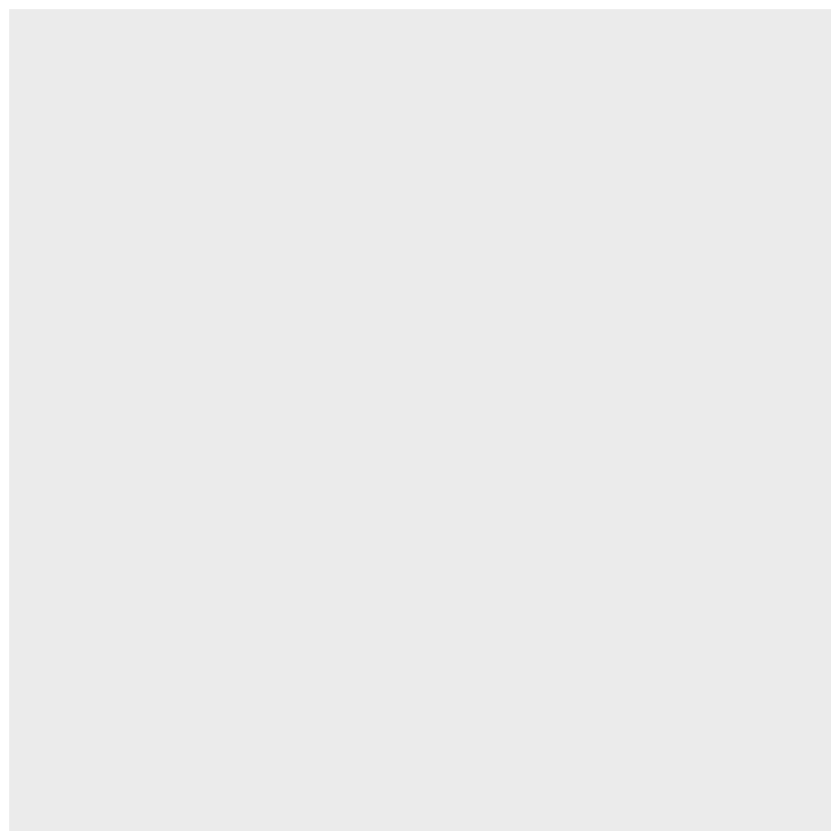

In [5]:
ggplot(d_exp)

Running the above code just gives us an empty frame. This is because we have just told ggplot which data we will use for plotting but have not yet plotted anything. We just filled the _Data_ part of ggplot.

Now we set the Aesthetic part of ggplot

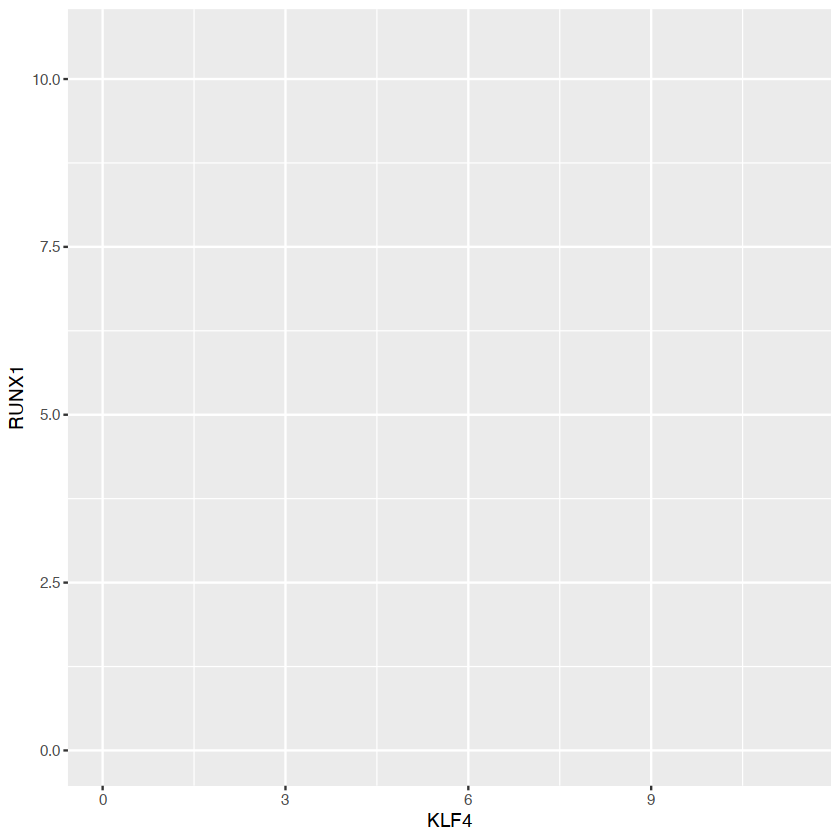

In [27]:
ggplot(d_exp, aes(x=KLF4, y=RUNX1))

Now we have told ggplot that we will use the gene expression value of KLF4 and RUNX1 to plot our data. But we have not told it whether the plot will be a scatter plot or a line plot or something else. So ggplot just sets the x-axis and y-axis with the gene names but have not plotted anything else. So far we have set the _Data_ and the _Aesthetic_ part of ggplot. Now we will set the final part which is the _Geometry_ part.

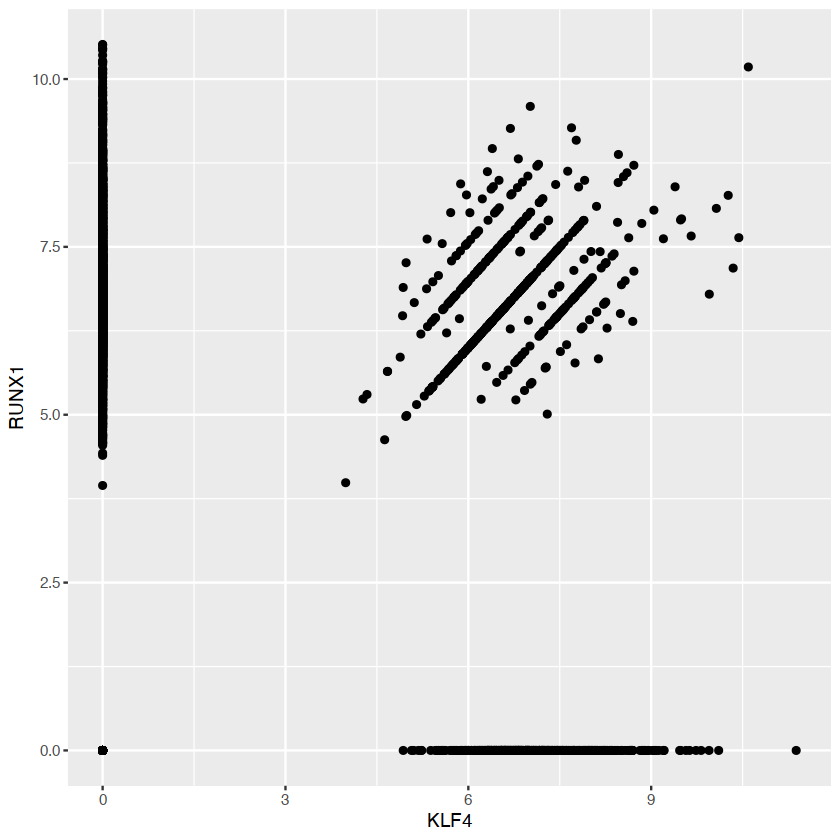

In [28]:
ggplot(d_exp, aes(x=KLF4, y=RUNX1)) + geom_point()

So, now got our first complete ggplot. The x-axis shows the expression of KLF4 and the y-axis shows the expression of RUNX1. Some cells are not expressing KLF4 or RUNX1 at all, so the gene expression values for those cells are zero. That is why we see dots around the zero line.

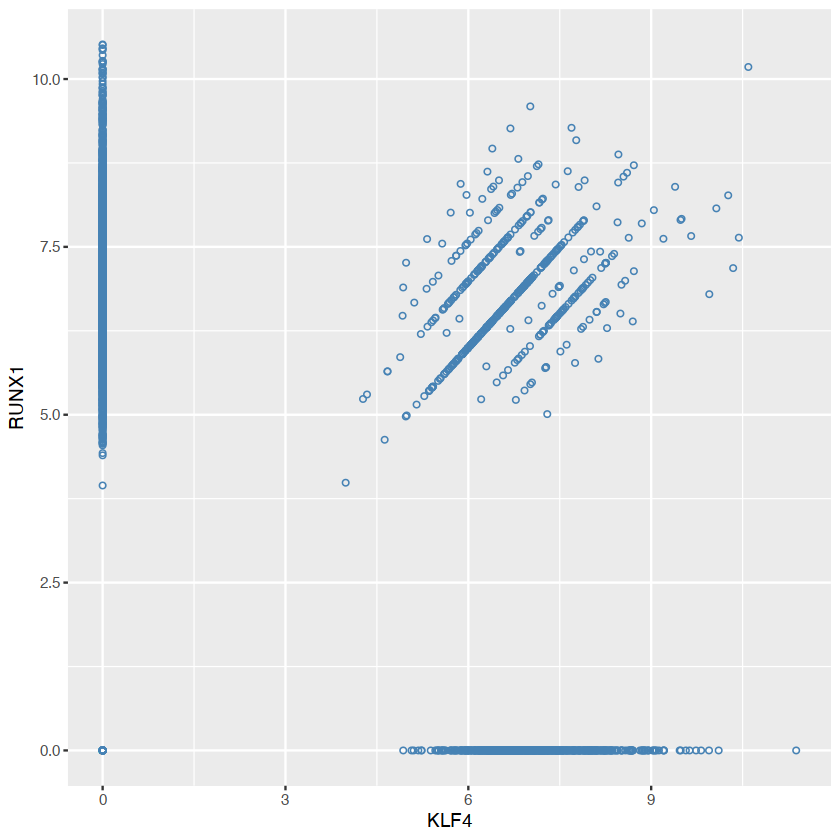

In [8]:
ggplot(d_exp, aes(x=KLF4, y=RUNX1)) + geom_point(size = 1.2, color = "steelblue", shape = 21)

You can see that the dots are now hollow. This is a different shape we have chosen here using the parameter `shape=21`. Also we changed the color of the dots to `steelblue`. There are lots of colours you can choose for your plots. A complete list of colours can be found in [R Color Palette](https://www.nceas.ucsb.edu/sites/default/files/2020-04/colorPaletteCheatsheet.pdf).

We can also store the plot in a variable, say `p`, so that we can print it later when we need it

Let us now try to colour the dots based on samples.

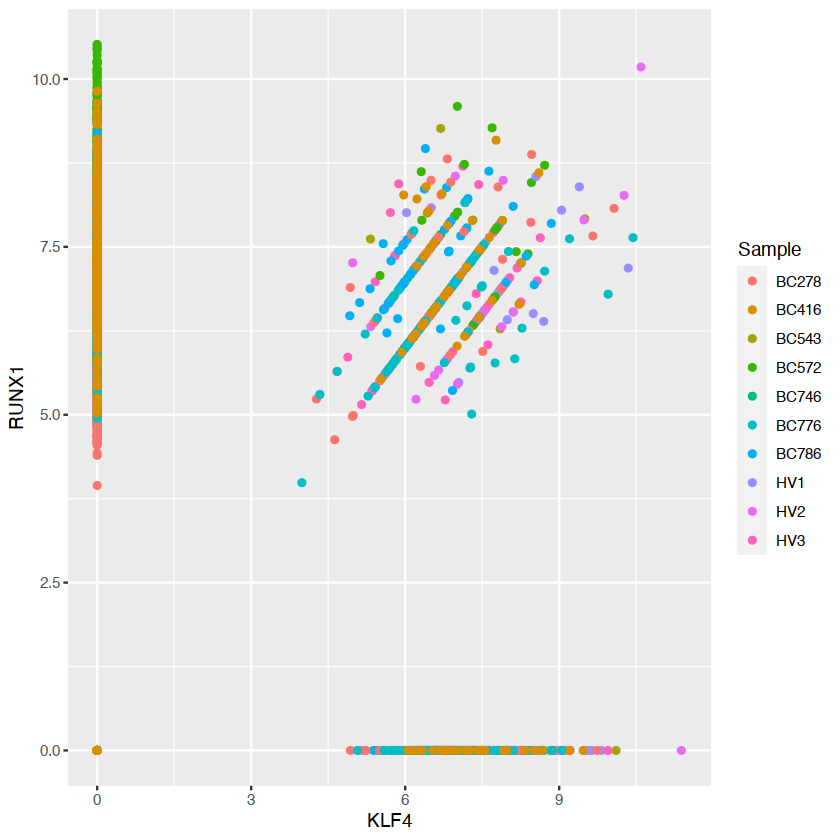

In [9]:
# Control points color by groups
ggplot(d_exp, aes(x=KLF4, y=RUNX1))+
  geom_point(aes(color = Sample))

In the plot above we coloured the dots based on samples. So each dots are coloured based on the sample it is coming from. You can see the color legend on the right of the figure. 

Now what if you do not like the default colours R is making, what if you want to change it to colours you like. You can change the default colours using `scale_color_manual`. Within `scale_color_manual` you can put the colour names from the color palette cheetsheet I mentioned earlier or you can use the HTML colour codes.

So what are the HTML colour code?

Each of the colour is represnted in the format __RGB__ where R is for red, G is for Green and B is for Blue. Each of the colour will take two hexa-decimal values (0 - 9 and then A - F). Each of the value creates a shade of the colour. For example, in the color red, the color code is #FF0000, which is '255' red, '0' green, and '0' blue. You need to start with a "#" sign to indicate that you are putting a colour code and not just a simple string.

We had 10 samples so we choose 10 colours below. Change the colour code to play with different values

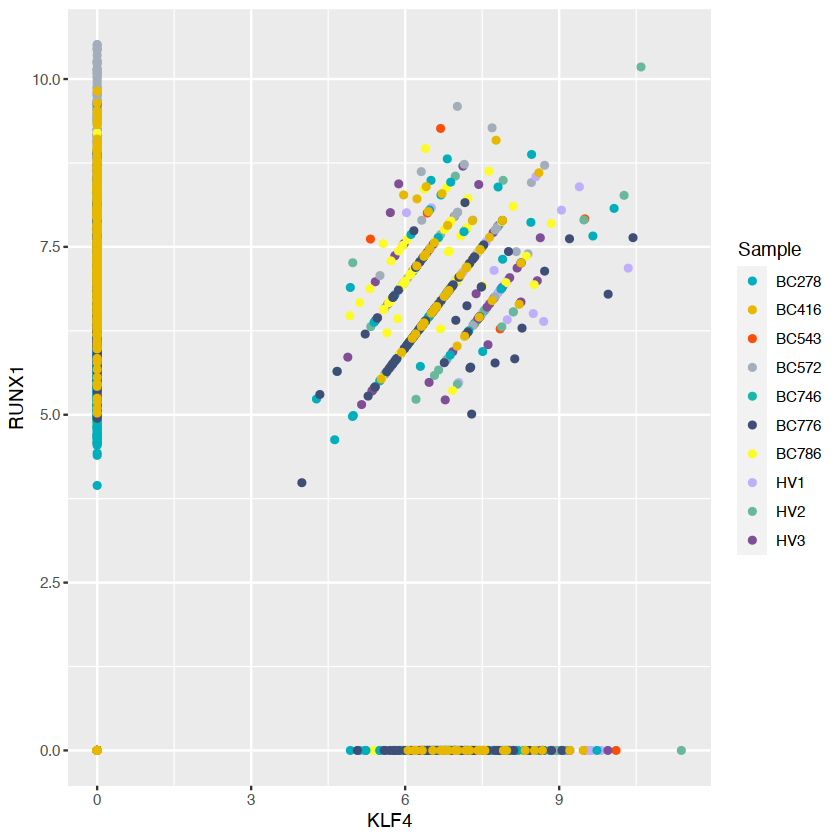

In [10]:

# Change the default color manually.
# Use the scale_color_manual() function
p <- ggplot(d_exp, aes(x=KLF4, y=RUNX1))+
  geom_point(aes(color = Sample))+
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#A2AFBB", "#17B8AB", 
                                "#3F4E77", "#FCFA27", "#BFAFFB", "#69B89B", "#7F4E97"))
print(p)

*****
[back to the top](#top)

### GGPlot theme

So far we have worked with only the `ggplot2` default theme that produces a grid with gray background. In this section we will learn how to chnage those themes.

As said before the default theme of ggplots is `theme_gray(`) (or `theme_grey()`), which is theme with grey background and white grid lines. More themes are available for professional presentations or publications. These include: `theme_bw(`), `theme_classic()` and `theme_minimal()`.

To change the theme of a given ggplot (p), we will use: `p + theme_classic()`.

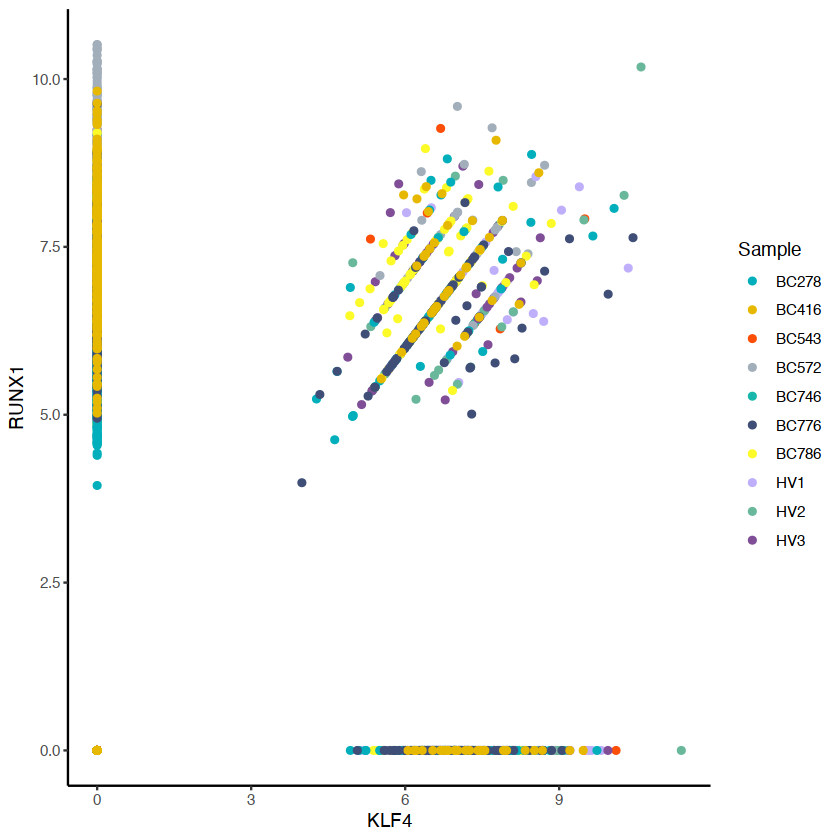

In [11]:
p <- ggplot(d_exp, aes(x=KLF4, y=RUNX1))+
  geom_point(aes(color = Sample))+
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#A2AFBB", "#17B8AB", "#3F4E77", "#FCFA27", "#BFAFFB", "#69B89B", "#7F4E97"))
p <- p + theme_classic()
print(p)

You can see that the background has changed from Gray to white and the grid lines have disappear. Now try with `theme_bw()` to see what other changes it makes. To know the details of the themes you can go to [ggplot complete theme](https://ggplot2.tidyverse.org/reference/ggtheme.html)

## Adding layers to ggplot object

Now, so far we have just drawn the scater plot using `geom_point()`. One strenght of ggplot is that we can add multiple layers on top of each other to visualize other information.

For e.g. now if we want to see how a regression line would fit to the gene expression data of KLF4 and RUNX1 we can calculate a regression line and add another layer to show the line on top of the plot we already prepared.

We would add these layers using other `geom`. So the plot using a regression line would look like

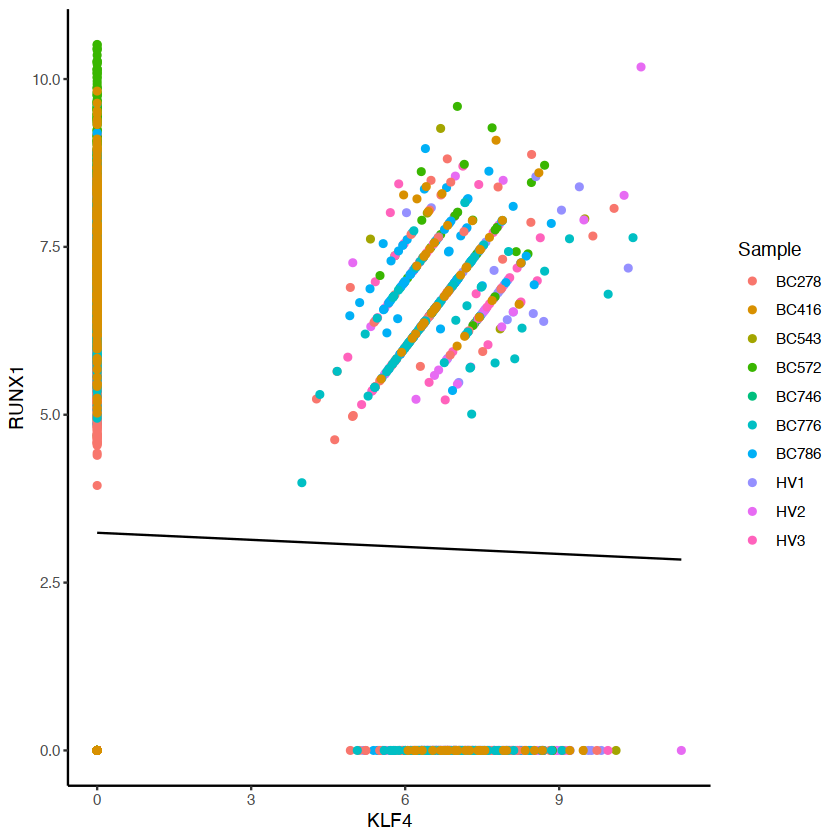

In [31]:
d_exp$pred.SC <- predict(lm(RUNX1 ~ KLF4, data = d_exp))

ggplot(d_exp, aes(x = KLF4, y = RUNX1)) + 
  geom_point(aes(color = Sample)) +
  geom_line(aes(y = pred.SC)) +
  theme_classic()

The `predict` is a generic function for predicting the line that fits the RUNX1 and KLF4 gene expression. We then take this fitted line and draw it using the geom `geom_line`. In this dataset, the line is not a great fit because of the zero expression by some cells.

### Setting Title, xlab & ylab

So far we have seen how to use ggplot2 and draw some basic plots. The label for the x-axis & y-axis was set by default by `ggplot`. Now what if we want to change the name of our axis to something else, we can do that using `xlab()` and `ylab` function. Also if we want to set the title of the plot we can do it using `ggtitle`

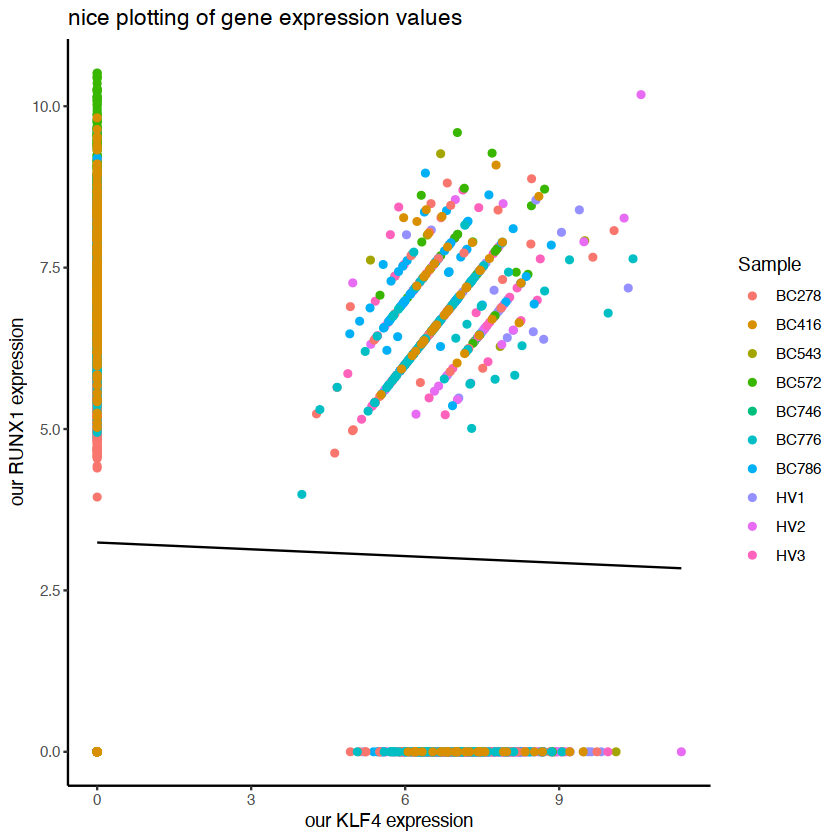

In [32]:
d_exp$pred.SC <- predict(lm(RUNX1 ~ KLF4, data = d_exp))

ggplot(d_exp, aes(x = KLF4, y = RUNX1)) + 
  geom_point(aes(color = Sample)) +
  geom_line(aes(y = pred.SC)) +
  xlab('our KLF4 expression') +
  ylab('our RUNX1 expression') +
  ggtitle('nice plotting of gene expression values')+
  theme_classic()

### Histogram

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



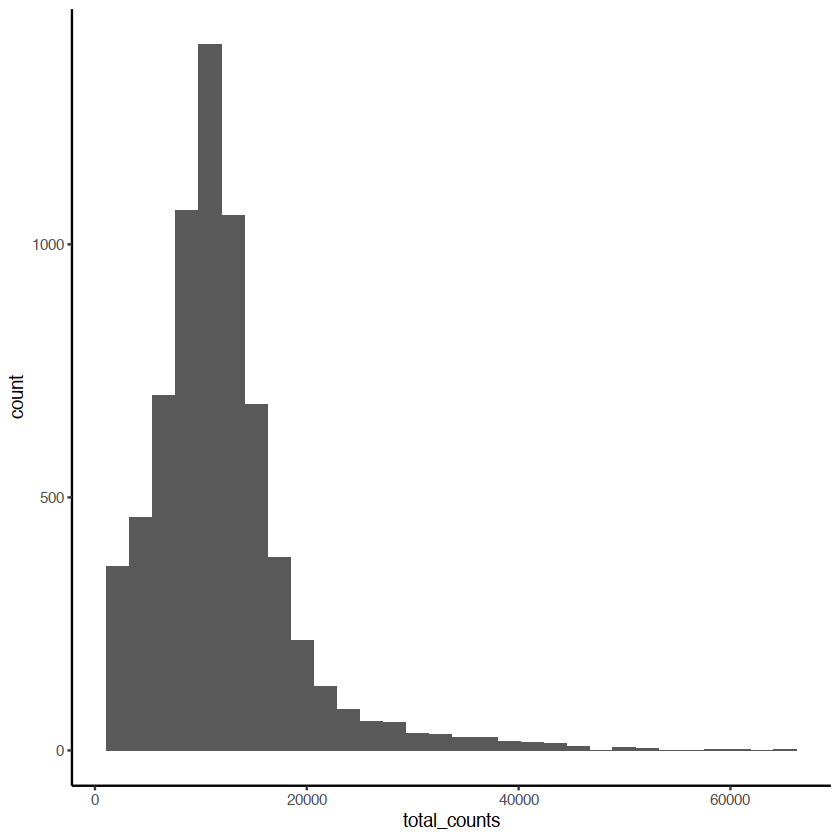

In [15]:
ggplot(d_exp, aes(x=total_counts)) + geom_histogram() + theme_classic() 

### Density plot

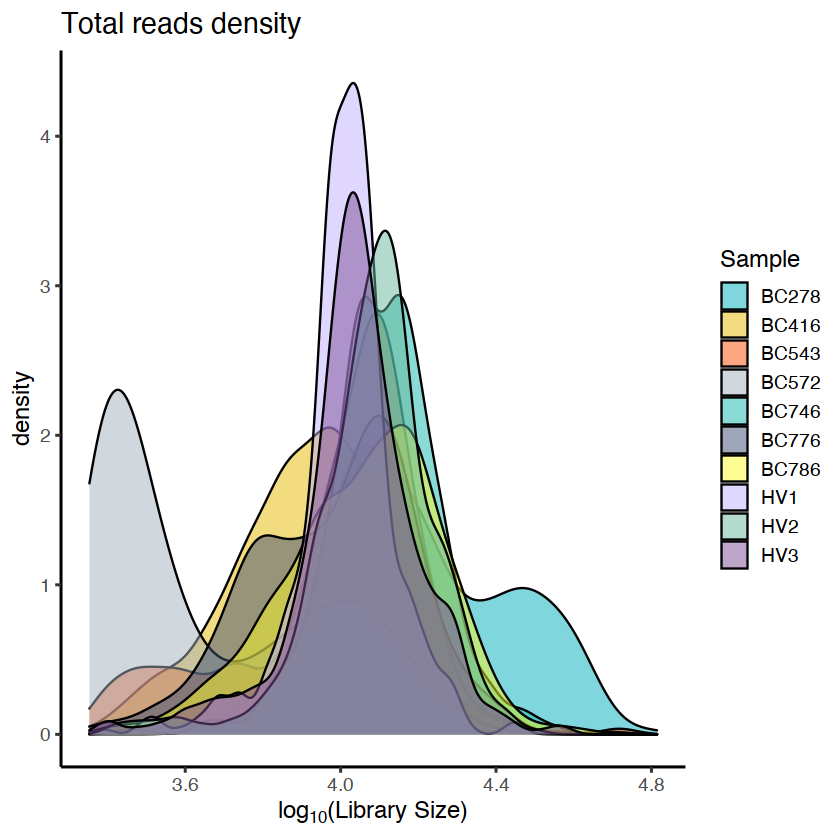

In [16]:
df <- data.frame(x=log10(sce$total_counts+1), Sample = sce$Sample)
ggplot(df,
       aes(x = x, fill = as.factor(Sample))) + 
       geom_density(alpha = 0.5) +
       labs(x = expression('log'[10]*'(Library Size)'), title = "Total reads density", fill = "Sample") + 
       theme_classic(base_size = 14) + # Setting the base size text for plots
       scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#A2AFBB", "#17B8AB", "#3F4E77", "#FCFA27", "#BFAFFB", "#69B89B", "#7F4E97")) # Need to set fill manual

### Facet

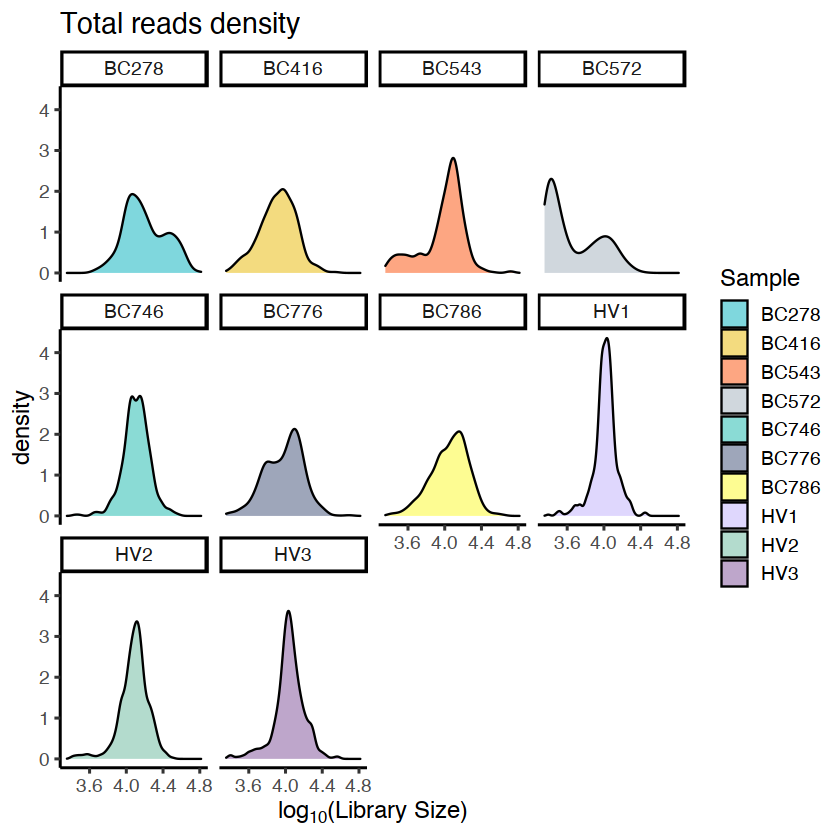

In [17]:
df <- data.frame(x=log10(sce$total_counts+1), Sample = sce$Sample)
ggplot(df,
       aes(x = x, fill = as.factor(Sample))) + 
       geom_density(alpha = 0.5) +
       labs(x = expression('log'[10]*'(Library Size)'), title = "Total reads density", fill = "Sample") + 
       theme_classic(base_size = 14) + # Setting the base size text for plots
       scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#A2AFBB", "#17B8AB", "#3F4E77", "#FCFA27", "#BFAFFB", "#69B89B", "#7F4E97")) +  # Need to set fill manual 
  facet_wrap(~Sample)

*****
[back to the top](#top)

## Statistical Transformations

Some plot types (such as scatterplots) do not require transformations–each point is plotted at x and y coordinates equal to the original value. Other plots, such as boxplots, histograms, prediction lines etc. require statistical transformations:

for a smoother the y values must be transformed into predicted values

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



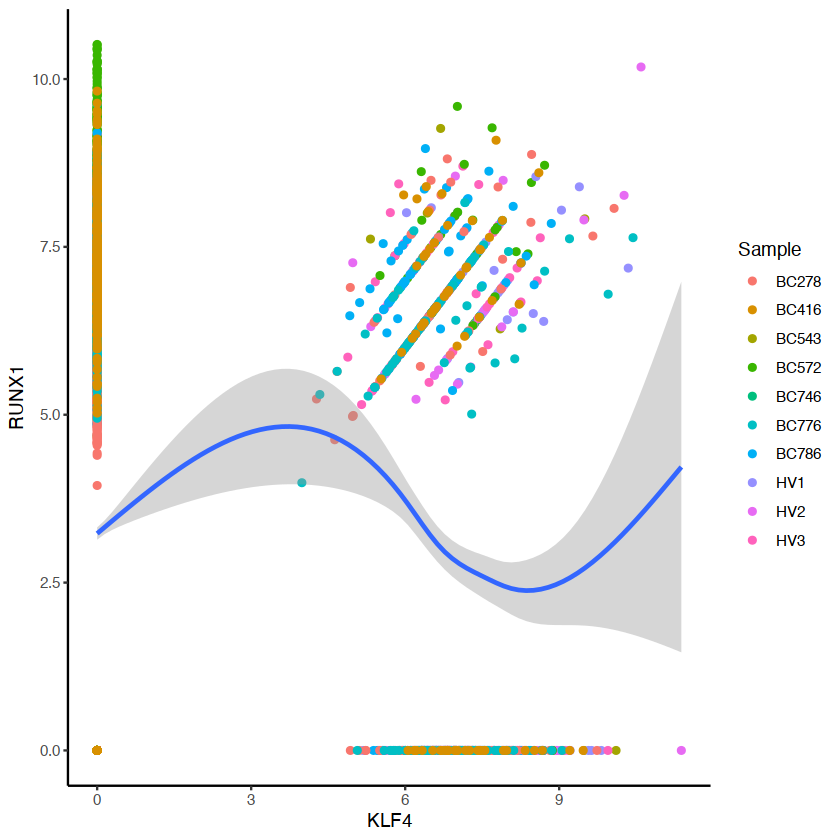

In [18]:
#d_exp$pred.SC <- predict(lm(RUNX1 ~ KLF4, data = d_exp))

ggplot(d_exp, aes(x = KLF4, y = RUNX1)) + 
  geom_point(aes(color = Sample)) +
  geom_smooth() +
  theme_classic()

`geom_smooth()` using formula 'y ~ x'



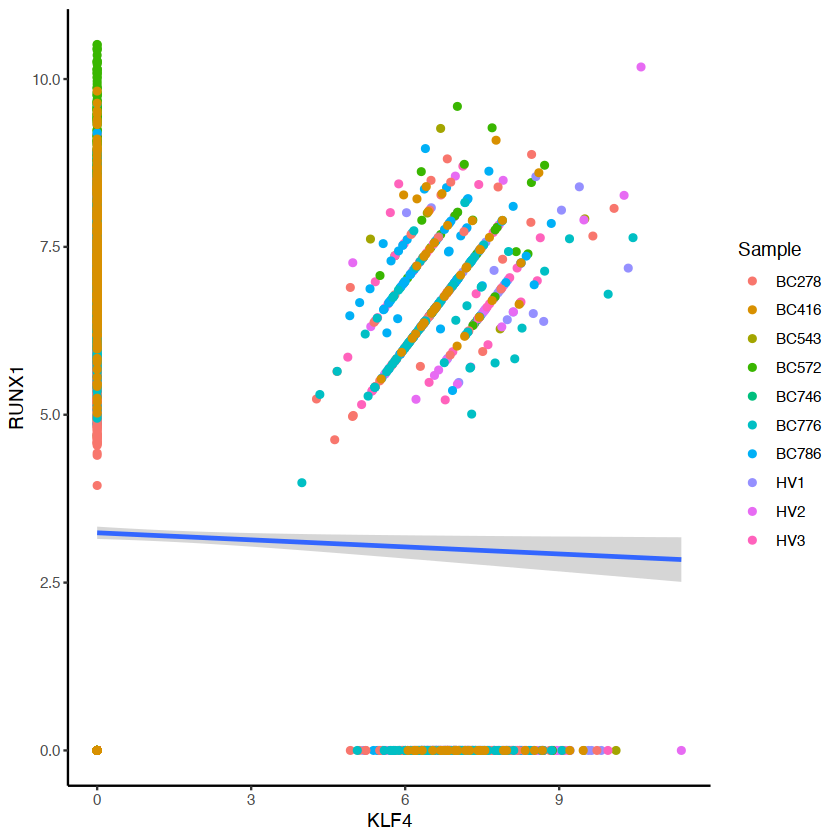

In [19]:
ggplot(d_exp, aes(x = KLF4, y = RUNX1)) + 
  geom_point(aes(color = Sample)) +
  geom_smooth(method = "lm") +
  theme_classic()

<a id="yourturn"></a>
## Your Turn


First let us look at the mpg dataset


In [4]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


<div class="alert alert-block alert-info">
    <b>Task 1</b></br>
<p>How would you plot the relationship between cty, the average city mileage, and hwy, the average highway mileage? How would you describe this relationship?</p>
</div>

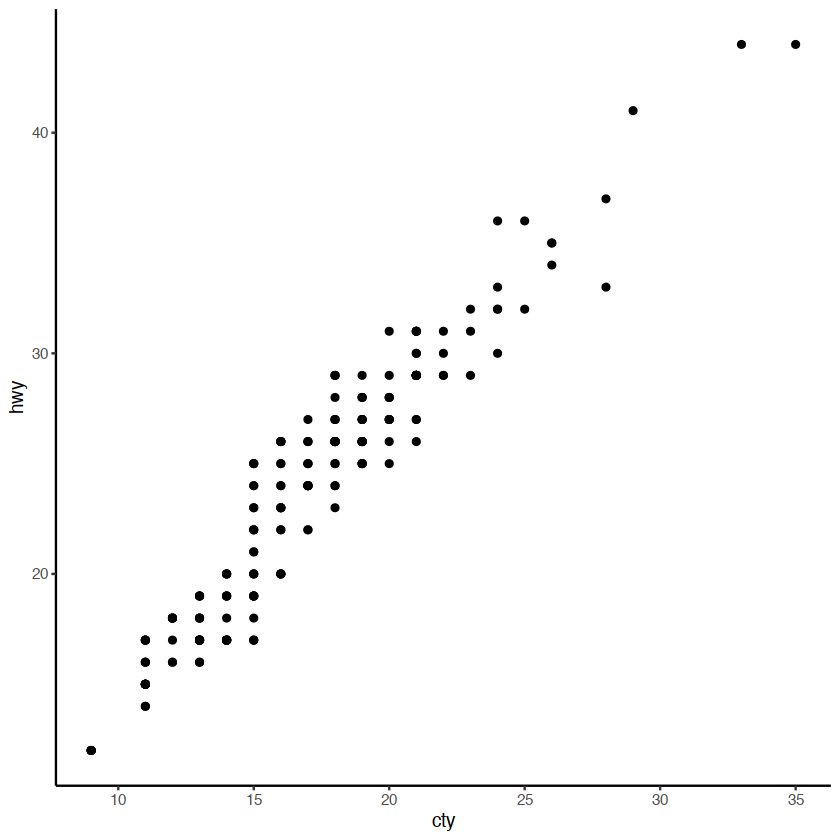

In [21]:
ggplot(mpg, aes(cty, hwy)) + 
  geom_point() +
  theme_classic()

<div class="alert alert-block alert-info">
    <b>Task 2</b> </br>
<p>How would you draw a smooth line? Also, how would you colour the transmissions differently?</p>

`geom_smooth()` using formula 'y ~ x'



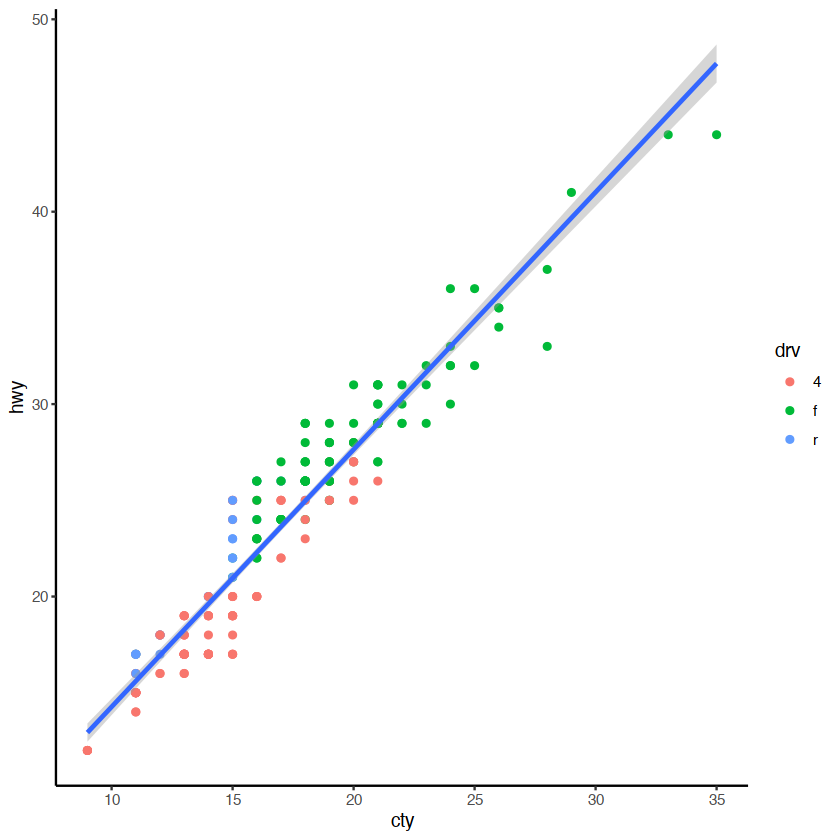

In [22]:
ggplot(mpg, aes(cty, hwy)) + 
  geom_point(aes(colour = drv)) +
  geom_smooth(method = "lm") +
  theme_classic()

<div class="alert alert-block alert-info">
    <b>Task 3</b> </br>
    <p>Show the distribution of scores for hwy, highway miles per gallon</p></div>

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



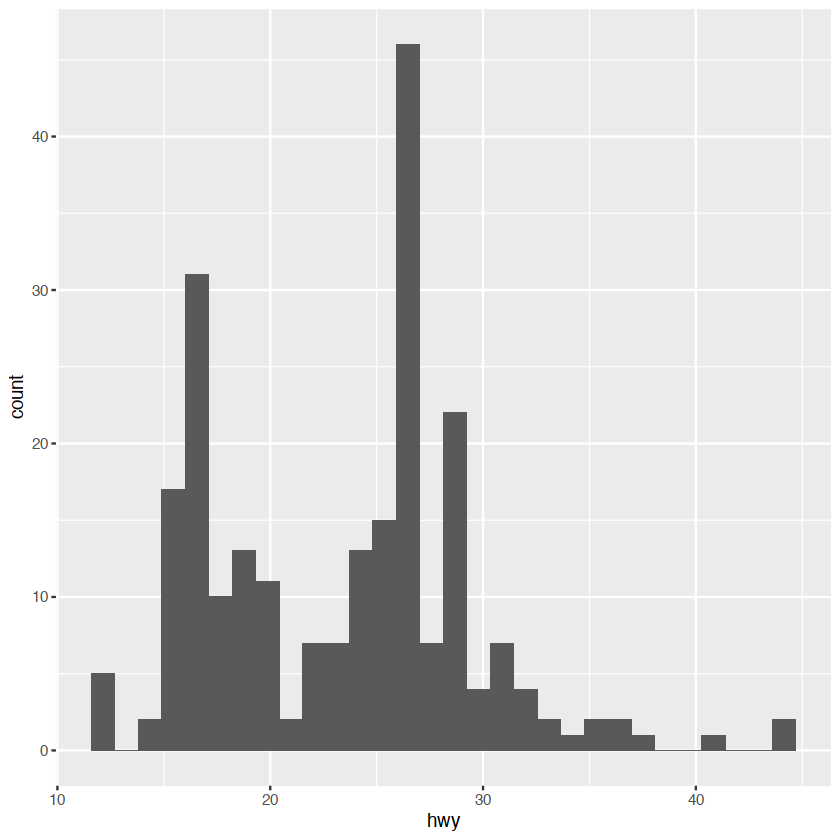

In [23]:
ggplot(mpg, aes(hwy)) + 
  geom_histogram()

<div class="alert alert-block alert-info">
    <b>Task 4</b> </br>
    <p>Produce a similar plot as shown below</p>
</div>
<img src="images/task4-ggplot.png" align="left" width="80%" />

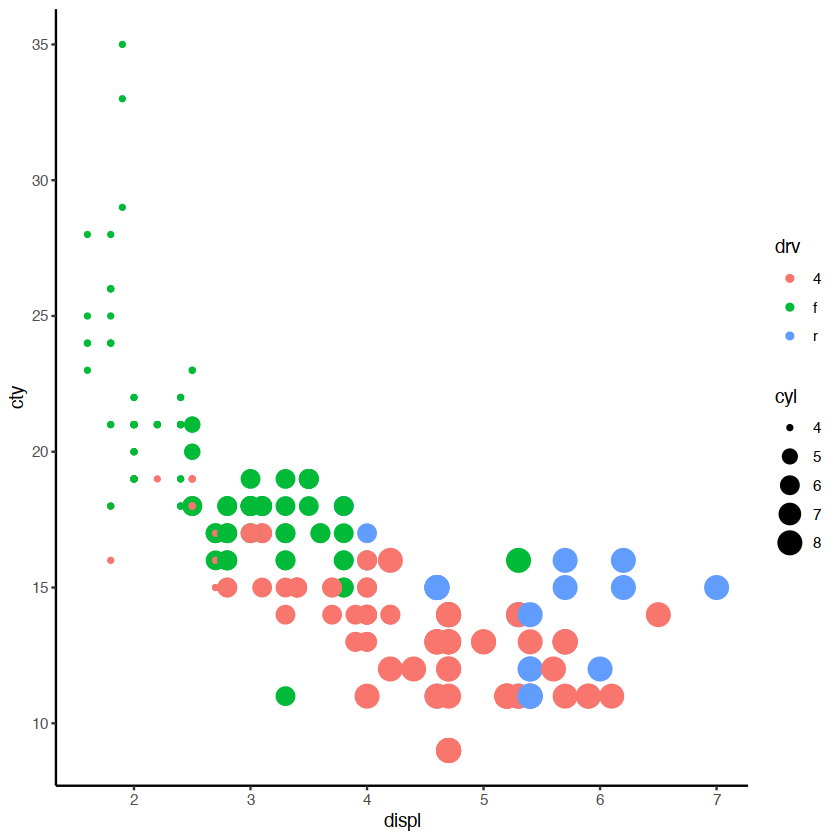

In [24]:
ggplot(mpg, aes(x=displ, y=cty, colour=drv, size=cyl)) +
  geom_point() + theme_classic()

*****
[back to the top](#top)

### Notebook details
<br>
<i>Notebook created by <strong>Syed Murtuza Baker</strong>. Other contributors include Fran Hooley... 

Publish date: May 2021<br>
Review date: May 2022</i>

Please give your feedback using the button below:

****

## Your Notes:
